In [1]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Path to the main flower dataset folder
dataset_folder = 'Crops\Corn'



In [4]:
# List of class names
class_names = ['Common_Rust','Gray_Leaf_Spot','Healthy','Northern_Leaf_Blight']


In [5]:
# Load and preprocess images
data = []
labels = []


In [6]:
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)


In [7]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)




In [8]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1958, 32, 32, 3)
y_train shape: (1958,)
x_val shape (490, 32, 32, 3)
y_val shape : (490,)
x_test shape: (613, 32, 32, 3)
y_test shape: (613,)


In [9]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
     

In [10]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 4)
y_val = keras.utils.to_categorical(y_val, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [11]:

from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)



In [12]:
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(4,activation='softmax'),
    ]
)
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()
     

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 512)       2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 256)      

In [15]:
y_train.shape

(1958, 4)

In [16]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])


Epoch 1/35
62/62 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.7446

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - 154s 2s/step - loss: 0.5615 - accuracy: 0.7446 - val_loss: 1.6642 - val_accuracy: 0.3163
Epoch 2/35
62/62 [==============================] - 123s 2s/step - loss: 0.4063 - accuracy: 0.8141 - val_loss: 4.5360 - val_accuracy: 0.2633
Epoch 3/35
62/62 [==============================] - 115s 2s/step - loss: 0.3089 - accuracy: 0.8641 - val_loss: 3.5185 - val_accuracy: 0.2633
Epoch 4/35
62/62 [==============================] - 118s 2s/step - loss: 0.3466 - accuracy: 0.8524 - val_loss: 1.1002 - val_accuracy: 0.5408
Epoch 5/35
62/62 [==============================] - 116s 2s/step - loss: 0.2314 - accuracy: 0.9132 - val_loss: 3.6963 - val_accuracy: 0.2653
Epoch 6/35
62/62 [==============================] - 117s 2s/step - loss: 0.2192 - accuracy: 0.9116 - val_loss: 2.4211 - val_accuracy: 0.2776
Epoch 7/35
62/62 [==============================] - 118s 2s/step - loss: 0.2690 - accuracy: 0.9055 - val_loss: 1.0206 - val_accuracy: 0.5898
Epoch 8/35
62/62 [======

In [17]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']




16/16 [==============================] - 4s 252ms/step - loss: 0.3754 - accuracy: 0.9020
Validation accuracy :  0.9020408391952515


In [18]:
import matplotlib.pyplot as plt

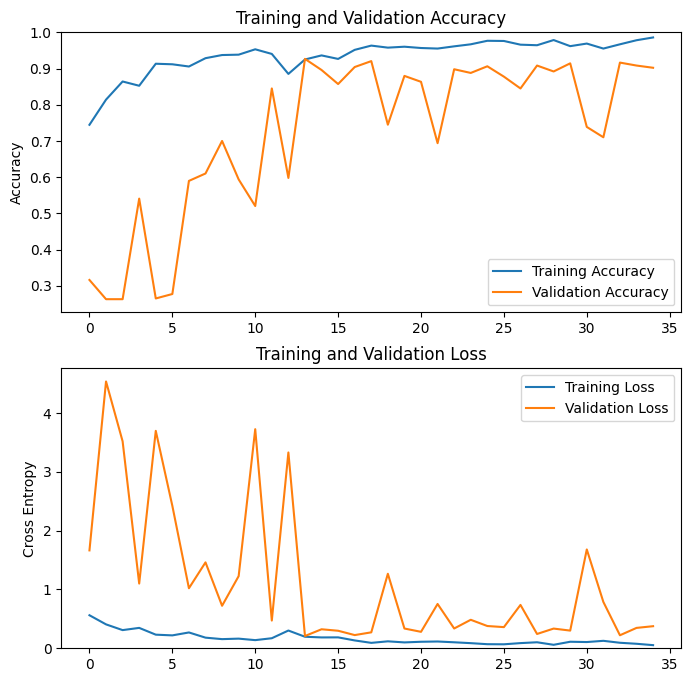

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()


In [20]:
import pandas as pd
import seaborn as sns
     

16/16 [==============================] - 5s 264ms/step


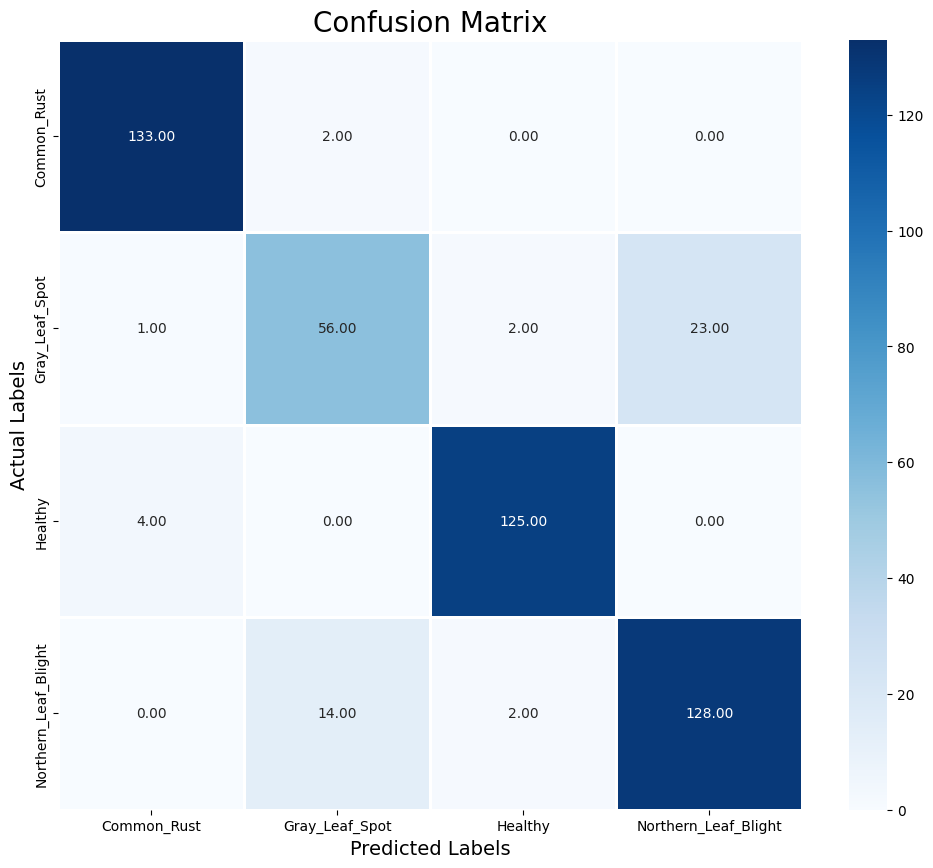

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       135
           1       0.78      0.68      0.73        82
           2       0.97      0.97      0.97       129
           3       0.85      0.89      0.87       144

    accuracy                           0.90       490
   macro avg       0.89      0.88      0.88       490
weighted avg       0.90      0.90      0.90       490



In [21]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

In [22]:
score = customModel.evaluate(x_test, y_test)
     

20/20 [==============================] - 5s 248ms/step - loss: 0.3349 - accuracy: 0.9233


In [23]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.33488547801971436
Test accuracy: 0.9233279228210449


In [24]:

customModel.save('Corn_Saved_Model')


INFO:tensorflow:Assets written to: Corn_Saved_Model\assets


INFO:tensorflow:Assets written to: Corn_Saved_Model\assets


In [26]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Corn_Saved_Model')

In [27]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [25]:


# List of class names
class_names = ['Common_Rust','Gray_Leaf_Spot','Healthy','Northern_Leaf_Blight']


In [ ]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)
